In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import BernoulliNB

from sklearn.naive_bayes import MultinomialNB
import warnings as wrn
wrn.filterwarnings("ignore")

In [2]:
df=pd.read_csv("train_set_taskA - train_set_Fire2022.csv")
display(df.head(10))

,anger,disgust,fear,sadness,surprise,happiness,neutral,Sentences
0,0,0,0,1,1,0,0,محبت کے پردے میں نفرت کرنےوالو
1,0,0,0,0,0,1,0,حامد میر کی خوشی کے لئے اس کا ذمہ دار حکومت ہو...
2,0,0,0,0,0,0,1,اس نئے سال کی شام، ایک سپاہی قاتل (لارنس Fishb...
3,0,0,0,0,0,0,1,کچھ اس طرح سے ایک فلم کے لئے جا سکتے ہیں لیکن ...
4,0,0,0,0,0,0,1,"رون ہاورڈ اور اس کے ""ایڈیٹرز"" صرف اتنا کرنا ....."
5,0,0,0,0,0,0,0,نتائج دنیا کو حیرت میں ڈال سکتی ھے نتائج دس اق...
6,0,0,0,0,1,0,0,ہم غصے خراب موڈ خوشی اور غمی سب میں چپلی کباب ...
7,0,0,0,1,1,0,0,اب ایسی حیرت و وارفتگی کو کیا کہیے دعا کو ہاتھ...
8,0,0,0,1,1,0,0,دے تو رہے ہیں آپ اپنی آنکھوں سے نفرت کی پٹی ات...
9,0,0,0,0,1,0,0,حیرت ہوئی


In [3]:
s = df.iloc[:, :7]
df['emotions'] = [str(s.columns[x].to_list()) for x in s.astype(bool).to_numpy()]
df

,anger,disgust,fear,sadness,surprise,happiness,neutral,Sentences,emotions
0,0,0,0,1,1,0,0,محبت کے پردے میں نفرت کرنےوالو,"['sadness', 'surprise']"
1,0,0,0,0,0,1,0,حامد میر کی خوشی کے لئے اس کا ذمہ دار حکومت ہو...,['happiness']
2,0,0,0,0,0,0,1,اس نئے سال کی شام، ایک سپاہی قاتل (لارنس Fishb...,['neutral']
3,0,0,0,0,0,0,1,کچھ اس طرح سے ایک فلم کے لئے جا سکتے ہیں لیکن ...,['neutral']
4,0,0,0,0,0,0,1,"رون ہاورڈ اور اس کے ""ایڈیٹرز"" صرف اتنا کرنا .....",['neutral']
...,...,...,...,...,...,...,...,...,...
7795,0,0,0,0,0,0,1,آپ کس طرح نوجوان برطانوی اداکار کی اس قابل احت...,['neutral']
7796,0,0,0,0,0,0,1,میں نے امریکہ کے کنفیڈریشن امریکہ میں ورجینیا ...,['neutral']
7797,0,0,0,0,0,1,0,سورۃ نمبر النساء آیت نمبر جب تم سفر پر جا رہے ...,['happiness']
7798,0,0,1,0,0,0,0,رونا یہ نہیں کہ حالات خراب ہیں اوراس بیماری نے...,['fear']


In [4]:
x,y = df["Sentences"],df["emotions"]

# Encoding Y 
encoder = LabelEncoder()
y = encoder.fit_transform(y)

print(y[:10])

[42 38 39 39 39 46 45 42 42 45]


In [5]:
print(len(np.unique(y)))

47


In [6]:
# Cleaning and lowering text
def cleanLower(texts):
    
    # This regular expression pattern means everything except alphabetical characters
    pattern = "^[a-zA-Z]"
    cleanText = []
    for text in texts:
        # re.sub(pattern) means replace everything with a space except alphabetical characters
        cleanText.append(re.sub(pattern," ",text).lower())
        
    return cleanText

x = cleanLower(x)
x[:4]

['محبت کے پردے میں نفرت کرنےوالو',
 'حامد میر کی خوشی کے لئے اس کا ذمہ دار حکومت ہو گی خوش',
 'اس نئے سال کی شام، ایک سپاہی قاتل (لارنس fishburne، کی شکل میں) ایک شعبے برف تک وجہ سے بند کر رہا ہے کہ میں ختم ہے. لوگوں پر محاصرے layed رہے ہیں، پولیس کو زندہ رہنے کے لئے cons کے ساتھ ٹیم کے لئے ہے. جان بڑھئ کلاسک کا یہ دوبارہ بنانے بس نہیں، بیوکوف پلاٹ twists پرے چند شامل تمام کشیدگی باہر لے، اور کاسٹ کرنے کے لئے ایک بینکر جان lequizamo شامل کرنے کے لئے تھا جو کیا تھا؟ پہلی فلم سنسنی خیز، کرکرا، اور دیکھنے کے لئے ایک خوشی تھی. یہ ایک اور ہالی ووڈ، آہنی اور دیکھ کرنے کے لئے تکلیف دہ ہے. میں نے اس فلم سے لیا صرف ایک ہی چیز ocd بہت پریشان کن ہو سکتا ہے ... بہت تھا. ختم ہونے والے گیت sooooooooooooooooo برا ہے <br /> <br /> میری گریڈ: d- <br /> <br /> dvd ایکسٹراز: richet، demonaco اور جیفری سلور کی شروحات؛ اختیاری تفسیر کے ساتھ خارج مناظر؛ 5 منٹ "مسلح اور خطرناک" ہتھیاروں کے ماہر پر featurette کے؛ 7 اور ڈیڑھ منٹ "شعبے دیواروں کے پیچھے"؛ "حملہ کی منصوبہ بندی"؛ "حملہ ٹیم"؛ 12 اور پردے کے پیچھے ڈ

In [7]:
len(x)

7800

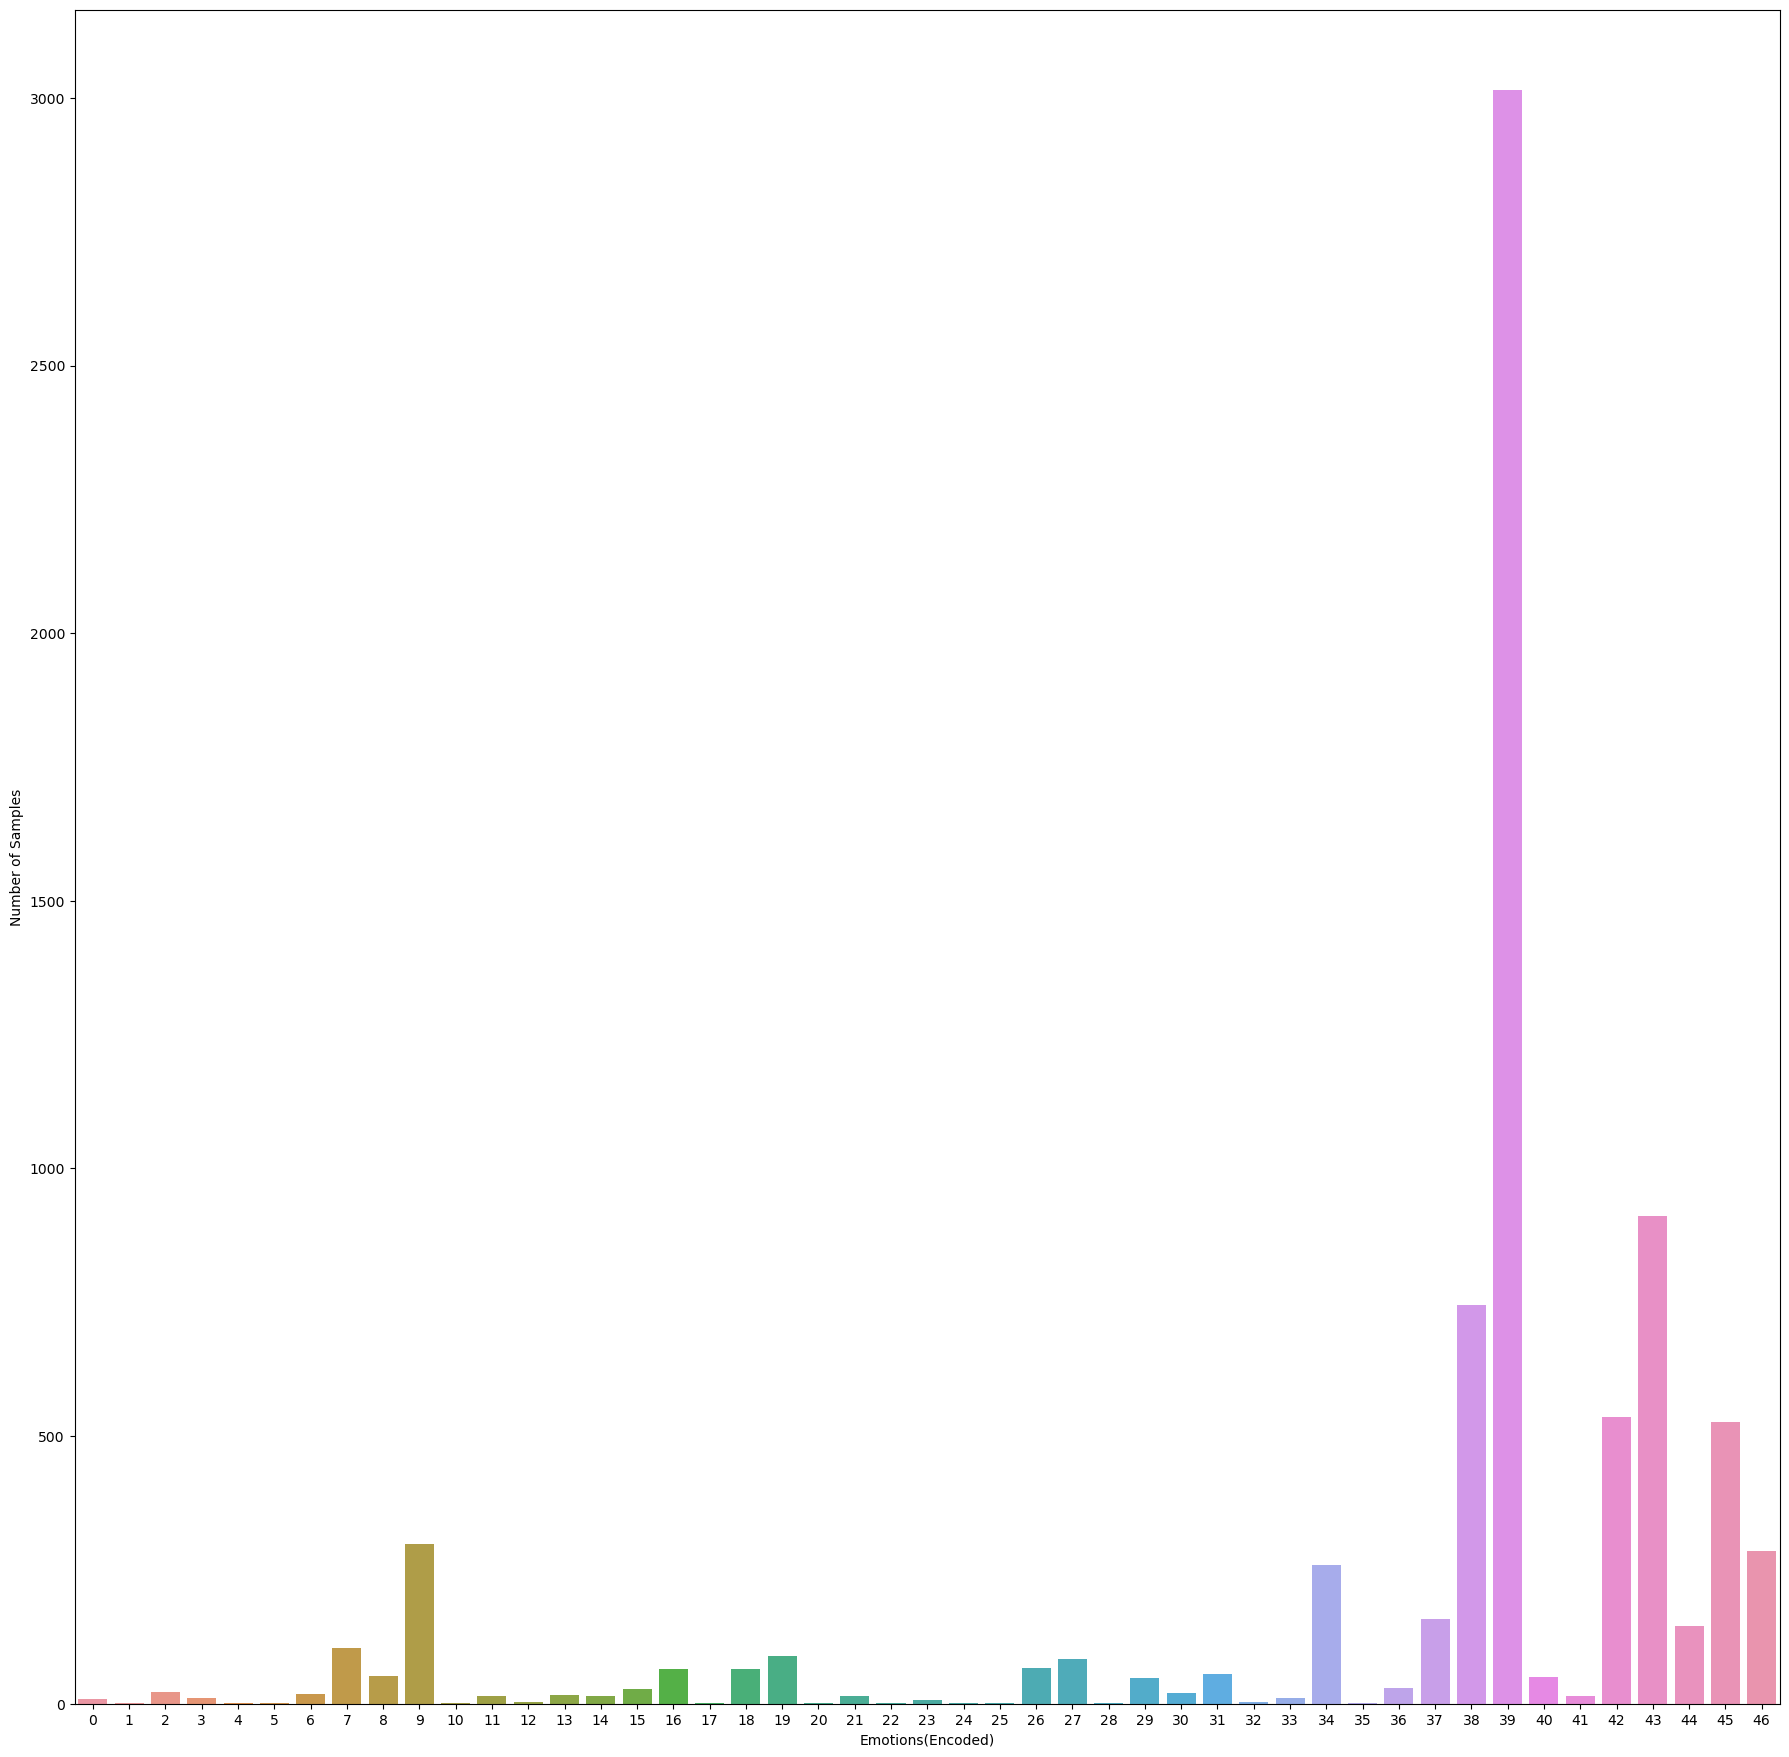

In [8]:
plt.subplots(figsize=(22,22))
sns.countplot(y)
plt.xlabel("Emotions(Encoded)")
plt.ylabel("Number of Samples")
plt.show()

In [9]:

vectorizer = CountVectorizer(max_features=10000)
x_end = vectorizer.fit_transform(x)

In [10]:
x_end.shape

(7800, 10000)

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x_end.toarray(),y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6240, 10000)
(1560, 10000)
(6240,)
(1560,)


In [12]:
start_time = time.time()


model = BernoulliNB()
model.fit(x_train,y_train)

end_time = time.time()
process_time = round(end_time-start_time,2)

print("Fitting Naive Bayes model took {} seconds".format(process_time))

Fitting Naive Bayes model took 7.64 seconds


In [13]:
def evalModel(cls,test_set):
    x,y = test_set
    y_pred = cls.predict(x)
    conf_matrix = confusion_matrix(y_pred=y_pred,y_true=y)
    acc = round(accuracy_score(y_pred=y_pred,y_true=y),2) * 100
    
    print(f"Accuracy is {acc}%")
    print(conf_matrix)
    plt.subplots(figsize=(10,10))
    sns.heatmap(conf_matrix,annot=True,fmt=".1f",linewidths=1.5)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

Accuracy is 56.99999999999999%
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0 17  0]
 [ 0  0  0 ...  0  1  0]]


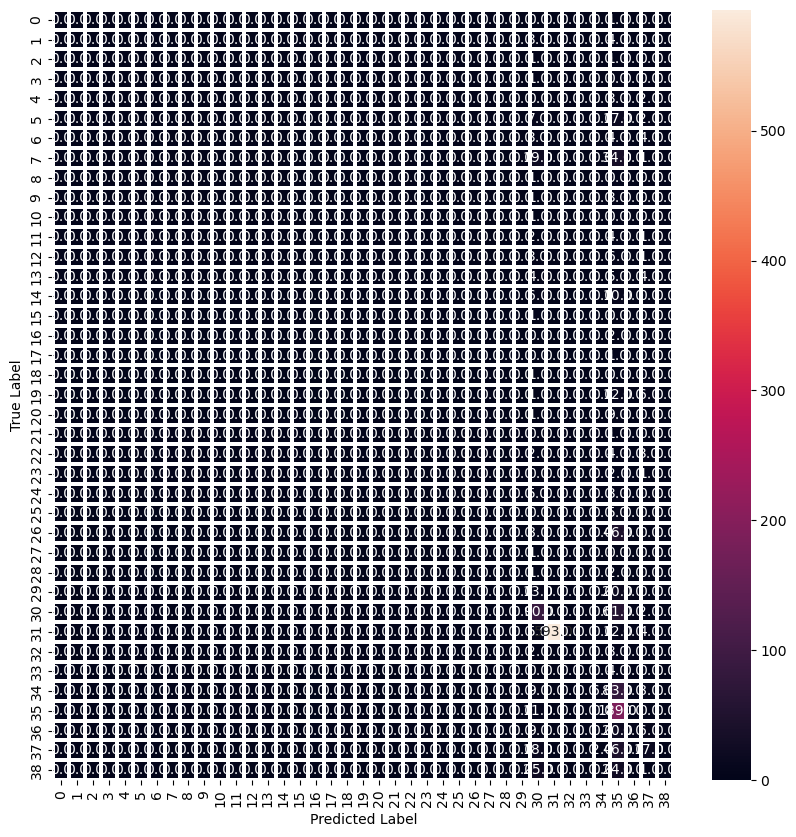

In [14]:
evalModel(model,(x_test,y_test))

In [15]:
encoder.inverse_transform([1,8])

array(["['anger', 'disgust', 'fear', 'surprise']",
       "['anger', 'disgust', 'surprise']"], dtype=object)

In [16]:

start_time = time.time()


model_2 = MultinomialNB()
model_2.fit(x_train,y_train)

end_time = time.time()
process_time = round(end_time-start_time,2)

print("Fitting Naive Bayes model took {} seconds".format(process_time))

Fitting Naive Bayes model took 7.45 seconds


Accuracy is 60.0%
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0 20  0]
 [ 0  0  0 ...  0  1  0]]


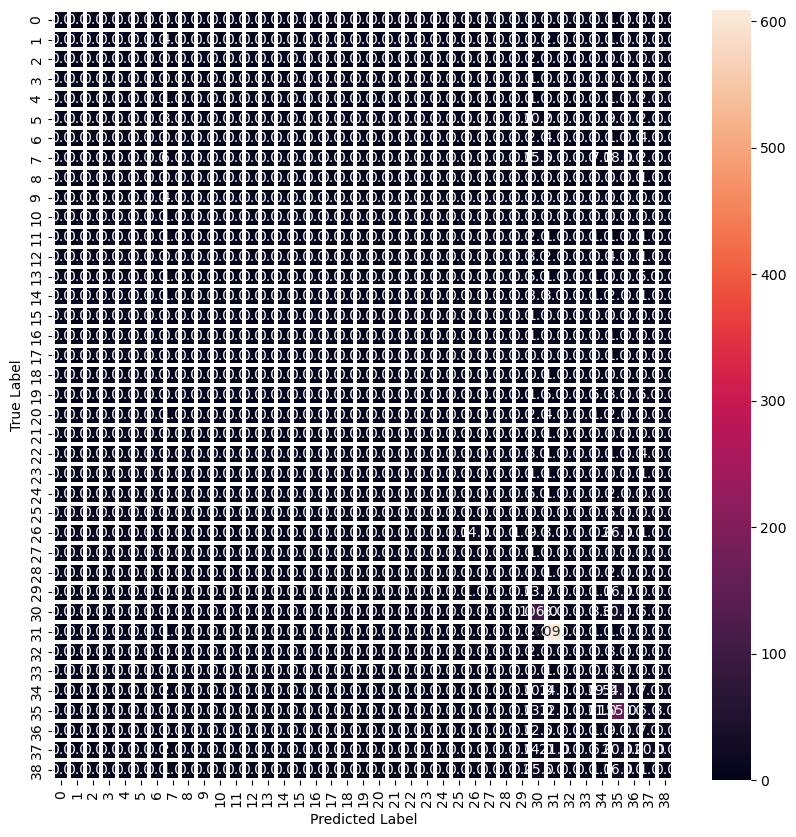

In [17]:
evalModel(model_2,(x_test,y_test))